In [1]:
# importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
# loading the data set

import pandas as pd
df=pd.read_csv("data-sheet-guvi-courses.csv",encoding = "UTF-8")
df

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,2016-03-08T22:28:36Z,Subject: Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,1216340.0,Learn to Play Sweet Child of Mine,https://www.udemy.com/learn-to-play-sweet-chil...,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,2017-06-30T17:33:29Z,Musical Instruments
3676,1026762.0,Coaching Course: Rhythm Instruction for Music ...,https://www.udemy.com/coaching-bundle-rhythm-i...,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,2017-03-10T17:06:46Z,Musical Instruments
3677,1223240.0,Learn Pirates of the Caribbean by Ear on the P...,https://www.udemy.com/learn-pirates-of-the-car...,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,2017-05-22T17:14:43Z,Musical Instruments
3678,1224186.0,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,2017-05-30T00:19:02Z,Musical Instruments


In [3]:
# The following 4 columns are irrelevant for rating prediction, so dropping those

df = df.drop(['course_title'],axis=1)
df = df.drop(['url'],axis=1)
df = df.drop(['published_timestamp'],axis=1)
df = df.drop(['course_id'],axis=1)

In [4]:
# There are random irrelevant ratings if the number of reviews is very low, so removing those.

df = df.drop(df[df['num_reviews']<5].index)

In [5]:
# dropping any rows with empty values

df = df.dropna(how='any',axis=0)

In [6]:
# one hot encoding for level and subject

df=pd.concat([df,pd.get_dummies(df.level).add_prefix('level_')],axis=1)
df=df.drop('level',axis=1)
df=pd.concat([df,pd.get_dummies(df.subject).add_prefix('subject_')],axis=1)
df=df.drop('subject',axis=1)

<Axes: >

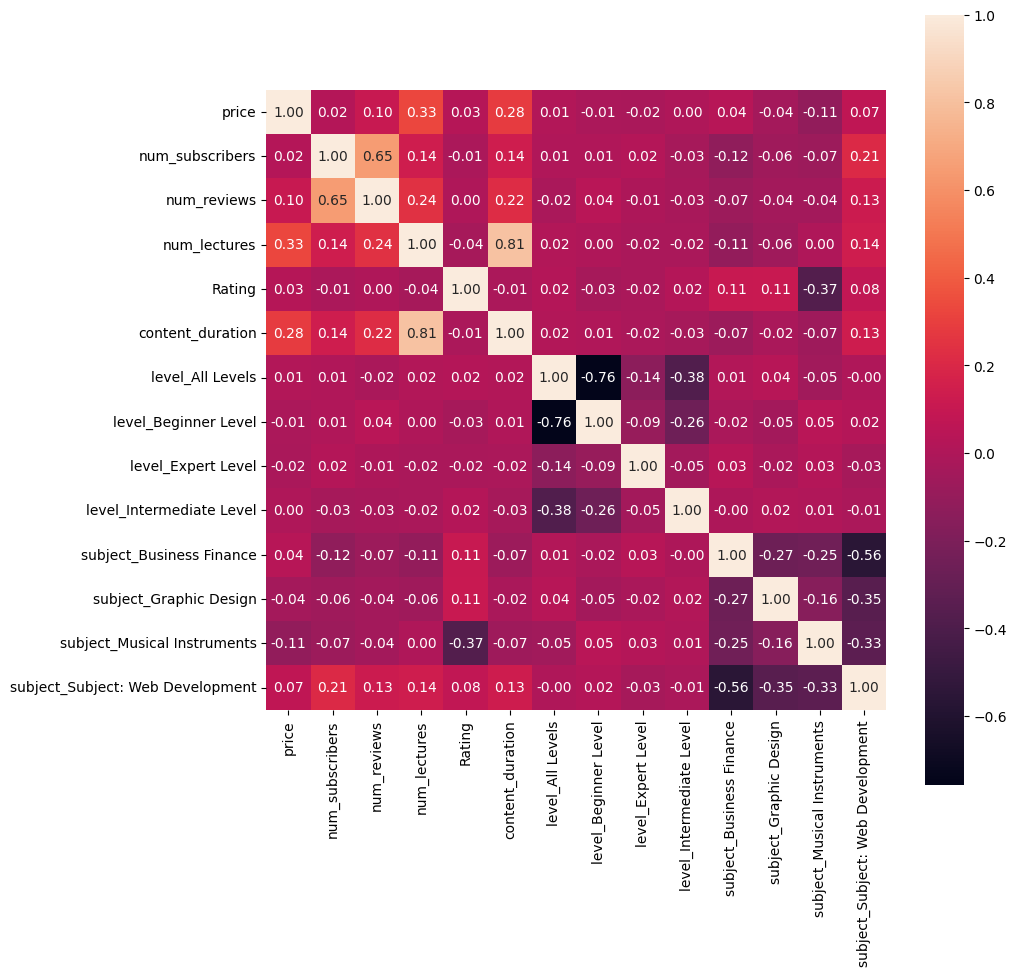

In [7]:
# checking correlation between columns

correlation=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,fmt='.2f',square='True',annot=True)

In [8]:
# Since the correlation between target(rating) and other columns is quite low. let's try
# deleting some outliers

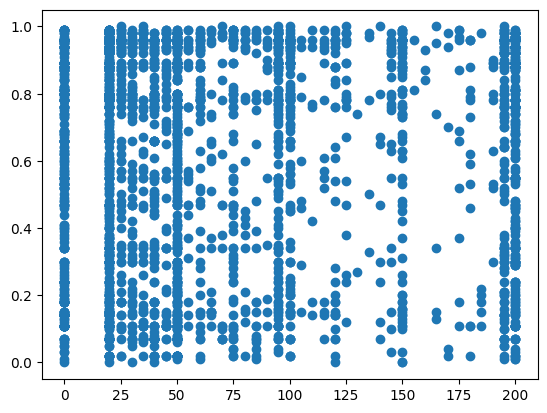

In [9]:
# price and rating has visibly no outliers

plt.scatter(df['price'],df['Rating'])

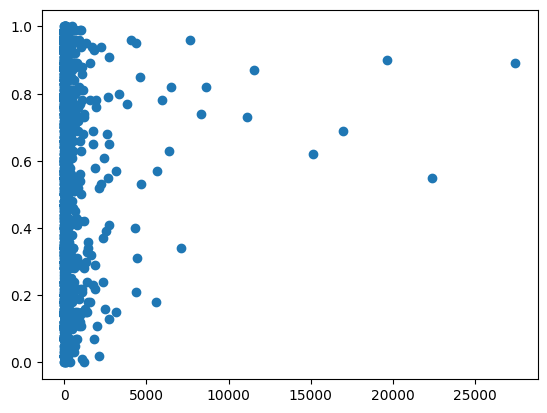

In [10]:
plt.scatter(df['num_reviews'],df['Rating'])

In [11]:
# removing records with more than 2000 reviews

df = df.drop(df[df['num_reviews']>2000].index)

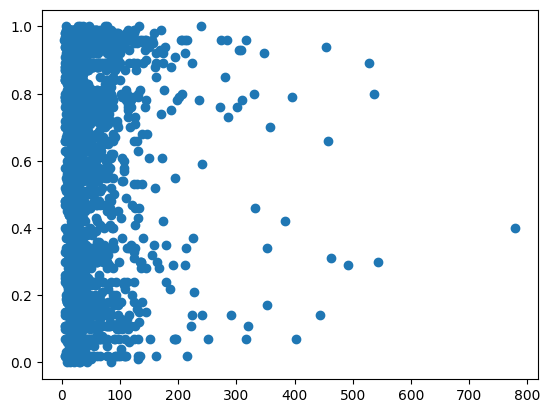

In [12]:
plt.scatter(df['num_lectures'],df['Rating'])

In [13]:
# removing records with more than 150 num_lectures

df = df.drop(df[df['num_lectures']>150].index)

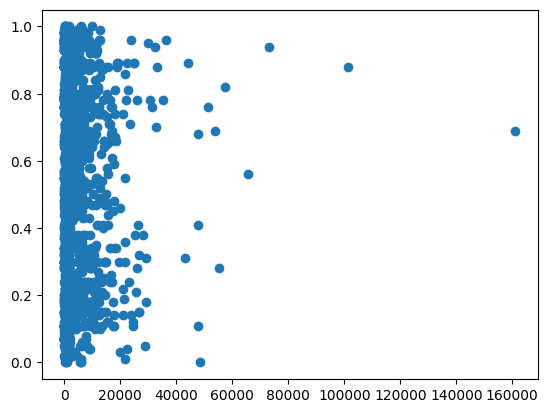

In [14]:
plt.scatter(df['num_subscribers'],df['Rating'])

In [15]:
# removing records with more than 20000 subscribers

df = df.drop(df[df['num_subscribers']>20000].index)

<Axes: >

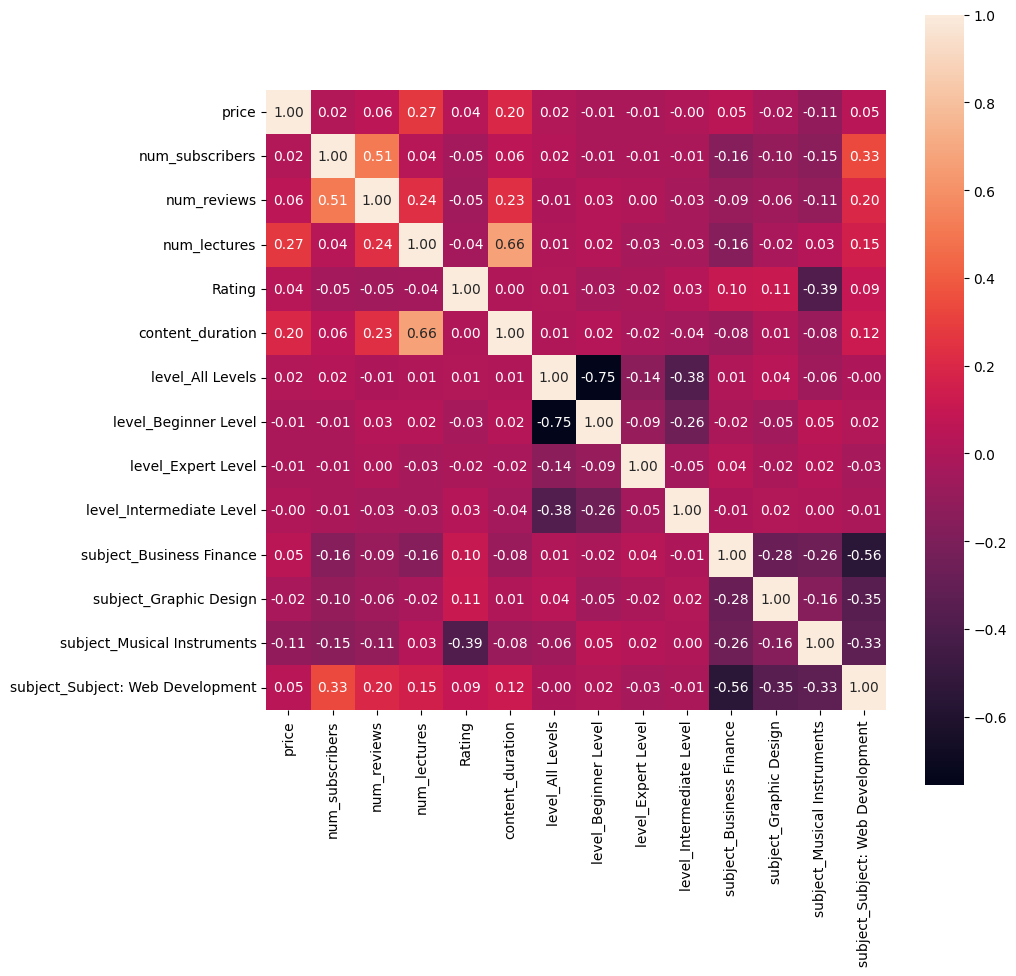

In [23]:
# checking correlation between columns

correlation=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,fmt='.2f',square='True',annot=True)

In [16]:
# defining x and y as independent variables and target respectively.

y=df['Rating']
x=df.drop(['Rating'],axis=1)

# converting the booleans to int

x=x.astype(int)

In [17]:
# checking the dataframe

x

,price,num_subscribers,num_reviews,num_lectures,content_duration,level_All Levels,level_Beginner Level,level_Expert Level,level_Intermediate Level,subject_Business Finance,subject_Graphic Design,subject_Musical Instruments,subject_Subject: Web Development
74,0,19909,411,17,3,1,0,0,0,0,0,0,1
76,50,18818,407,80,11,0,1,0,0,0,0,0,1
77,20,18777,1112,21,1,0,1,0,0,0,0,0,1
78,0,18496,386,30,2,1,0,0,0,0,0,0,1
79,100,18324,333,16,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,40,33,5,26,2,1,0,0,0,0,0,1,0
3517,20,28,7,72,4,1,0,0,0,0,0,1,0
3525,65,26,5,23,3,0,1,0,0,0,0,1,0
3542,50,20,6,24,2,0,1,0,0,0,0,1,0


In [18]:
#performing train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [19]:
# fitting the model and printing metrics

regressor = GradientBoostingRegressor(max_depth=10)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))

-0.5427673525069954
0.22267644769965017
0.08629615866790599


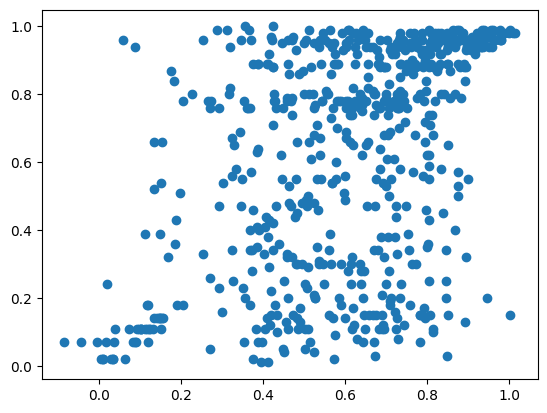

In [20]:
# visualising the result

plt.scatter(y_pred,y_test)

-0.6071530615947618
0.22855373571663054
0.08438592497171768


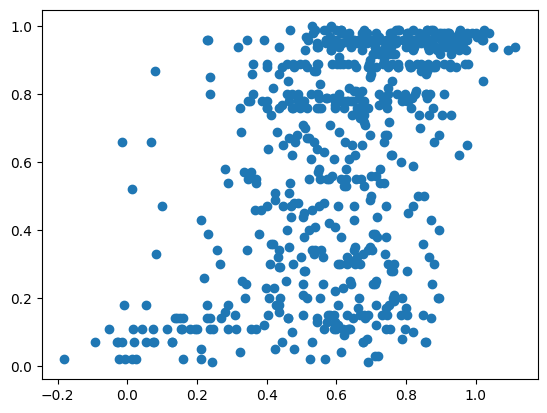

In [21]:
# Trying out another regressor and visualizing the result

regressor= XGBRegressor()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))
plt.scatter(y_pred,y_test)

-3.449021572267746
0.26415688102192014
0.09316204506894357


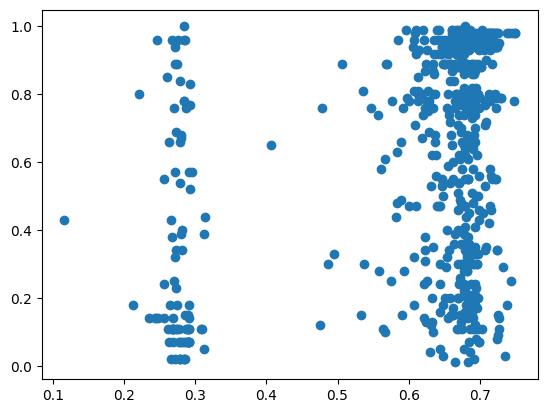

In [22]:
# trying out linear regressor and visualizing the result.

regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))
plt.scatter(y_pred,y_test)